In [0]:
!pip install catalyst
!pip install pretrainedmodels
!pip install git+https://github.com/qubvel/segmentation_models.pytorch
!pip install pytorch_toolbelt
!pip install torchvision==0.4


     |████████████████████████████████| 307kB 7.4MB/s 
     |████████████████████████████████| 194kB 69.6MB/s 
     |████████████████████████████████| 460kB 73.9MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


     |████████████████████████████████| 61kB 4.8MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60963 sha256=1771424121eebad5d55f8ea657b1b3fa97a6df841f25ca611698627f1d0e8eb1
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels
  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-tsvtun13
  Running command git clone -q https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-tsvtun13
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.1.0-cp36-none-any.whl size=42612 sha256=aa27ed0a78ae318ece771769e35437d484a09c8cd182e12382a41c64339e57d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-43m35eu5/wheels/79/3f/09/1587a252e0314d26ad242d6d2e165622ab95c95e5cfe4b942c
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.5.1-cp36-none-any.whl size=1176

In [0]:
#import os
#!git clone https://www.github.com/matterport/Mask_RCNN.git
#os.chdir('Mask_RCNN')

#!rm -rf .git # to prevent an error when the kernel is committed
#!rm -rf images assets # to prevent displaying images at the bottom of a kernel

In [0]:
#!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
#!ls -lh mask_rcnn_coco.h5

#COCO_WEIGHTS_PATH = 'mask_rcnn_coco.h5'

In [0]:
pip install kaggle --upgrad


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --upgrad (--upgrade, --upgrade-strategy?)


In [0]:
!mkdir /root/.kaggle
!pip install kaggle
api_token = {"username":"yqliu96","key":"34e41c545a50955f1d1a68f816edcc4e"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!kaggle competitions download -c understanding_cloud_organization
if not os.path.exists("/content/competitions/understanding_cloud_organization"):
    os.makedirs("/content/competitions/understanding_cloud_organization")
os.chdir('/content/competitions/understanding_cloud_organization')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 3.44G/3.44G [00:22<00:00, 129MB/s]
100% 3.44G/3.44G [00:22<00:00, 167MB/s]
100% 2.30G/2.30G [00:15<00:00, 152MB/s]
100% 2.30G/2.30G [00:15<00:00, 157MB/s]
100% 54.0M/54.2M [00:00<00:00, 135MB/s]
100% 54.2M/54.2M [00:00<00:00, 155MB/s]
  0% 0.00/321k [00:00<?, ?B/s]
100% 321k/321k [00:00<00:00, 101MB/s]


BadZipFile: ignored

In [0]:
path = '/content/competitions/understanding_cloud_organization'
os.listdir()

['train.csv.zip',
 'train.csv',
 'sample_submission.csv',
 'train_images.zip',
 'test_images.zip']

In [0]:
import pandas as pd


In [0]:
train = pd.read_csv(f'{path}/train.csv.zip')
sub = pd.read_csv(f'{path}/sample_submission.csv')

In [0]:
import os
import gc
import sys
import time
import json
import glob
import random
from pathlib import Path
import pandas as pd

from PIL import Image
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa

import itertools
from tqdm import tqdm

In [0]:
train_df = pd.read_csv(f'{path}/train.csv.zip')
train_df = train_df.dropna()
train_df.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...
7,002be4f.jpg_Sugar,67495 350 68895 350 70295 350 71695 350 73095 ...


In [0]:
	
from zipfile import ZipFile
with ZipFile('/content/competitions/understanding_cloud_organization/train_images.zip', 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!')

File Name                                             Modified             Size
81de6b7.jpg                                    2019-08-07 23:18:28       559936
17ff40b.jpg                                    2019-08-07 23:06:40       456705
bc3f6f9.jpg                                    2019-08-07 23:24:34       680482
f015e18.jpg                                    2019-08-07 23:30:12       532606
86321fe.jpg                                    2019-08-07 23:18:54       628099
10cbb5e.jpg                                    2019-08-07 23:05:46       555976
dcf0346.jpg                                    2019-08-07 23:28:02       768188
3f46c09.jpg                                    2019-08-07 23:11:10       513861
e2245ce.jpg                                    2019-08-07 23:28:36       687887
fc27e95.jpg                                    2019-08-07 23:31:28       712353
0d38eab.jpg                                    2019-08-07 23:05:24       631177
168f8f5.jpg                             

In [0]:
category_list = ["Fish","Flower","Gravel","Sugar"]

In [0]:
train_dict = {}
train_class_dict = {}
for idx, row in train_df.iterrows():
    image_filename = row.Image_Label.split("_")[0]
    class_name = row.Image_Label.split("_")[1]
    class_id = category_list.index(class_name)
    if train_dict.get(image_filename):
        train_dict[image_filename].append(row.EncodedPixels)
        train_class_dict[image_filename].append(class_id)
    else:
        train_dict[image_filename] = [row.EncodedPixels]
        train_class_dict[image_filename] = [class_id]

In [0]:
df = pd.DataFrame(columns=["image_id","EncodedPixels","CategoryId","Width","Height"])
for key, value in train_dict.items():
    img = Image.open("/content/competitions/understanding_cloud_organization/{}".format(key))
    width, height = img.width, img.height
    df = df.append({"image_id": key, "EncodedPixels": value, "CategoryId": train_class_dict[key], "Width": width, "Height": height},ignore_index=True)

In [0]:
DATA_DIR = Path('/content/competitions/understanding_cloud_organization/')
ROOT_DIR = ""

NUM_CATS = len(category_list)
IMAGE_SIZE = 512

In [0]:
!git clone https://www.github.com/matterport/Mask_RCNN.git
os.chdir('Mask_RCNN')

!rm -rf .git # to prevent an error when the kernel is committed
!rm -rf images assets # to prevent displaying images at the bottom of a kernel

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.83 MiB | 26.62 MiB/s, done.
Resolving deltas: 100% (569/569), done.


In [0]:
sys.path.append('/Mask_RCNN')
from mrcnn.config import Config

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Using TensorFlow backend.


In [0]:
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!ls -lh mask_rcnn_coco.h5

COCO_WEIGHTS_PATH = 'mask_rcnn_coco.h5'

-rw-r--r-- 1 root root 246M Nov 26  2017 mask_rcnn_coco.h5


In [0]:
class CloudConfig(Config):
    NAME = "cloud"
    NUM_CLASSES = NUM_CATS + 1 # +1 for the background class
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 4 #That is the maximum with the memory available on kernels
    
    BACKBONE = 'resnet50'
    
    IMAGE_MIN_DIM = IMAGE_SIZE
    IMAGE_MAX_DIM = IMAGE_SIZE    
    IMAGE_RESIZE_MODE = 'none'
    
    RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)
    
    # STEPS_PER_EPOCH should be the number of instances 
    # divided by (GPU_COUNT*IMAGES_PER_GPU), and so should VALIDATION_STEPS;
    # however, due to the time limit, I set them so that this kernel can be run in 9 hours
    STEPS_PER_EPOCH = 4500
    VALIDATION_STEPS = 500
    
config = CloudConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     4
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 4
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              none
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                

In [0]:
def resize_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA)  
    return img

In [0]:
del zip

In [0]:
import itertools
class CloudDataset(utils.Dataset):

    def __init__(self, df):
        super().__init__(self)
        
        # Add classes
        for i, name in enumerate(category_list):
            self.add_class("cloud", i+1, name)
        
        # Add images 
        for i, row in df.iterrows():
            self.add_image("cloud", 
                           image_id=row.name, 
                           path='/content/competitions/understanding_cloud_organization/'+str(row.image_id), 
                           labels=row['CategoryId'],
                           annotations=row['EncodedPixels'], 
                           height=row['Height'], width=row['Width'])

    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path'], [category_list[int(x)] for x in info['labels']]
    
    def load_image(self, image_id):
        return resize_image(self.image_info[image_id]['path'])

    def load_mask(self, image_id):
        info = self.image_info[image_id]
                
        mask = np.zeros((IMAGE_SIZE, IMAGE_SIZE, len(info['annotations'])), dtype=np.uint8)
        labels = []
        
        for m, (annotation, label) in enumerate(zip(list(info['annotations']), list(info['labels']))):
            sub_mask = np.full(info['height']*info['width'], 0, dtype=np.uint8)
            annotation = [int(x) for x in annotation.split(' ')]
            
            for i, start_pixel in enumerate(annotation[::2]):
                sub_mask[start_pixel: start_pixel+annotation[2*i+1]] = 1

            sub_mask = sub_mask.reshape((info['height'], info['width']), order='F')
            sub_mask = cv2.resize(sub_mask, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)
            
            mask[:, :, m] = sub_mask
            labels.append(int(label)+1)
            
        return mask, np.array(labels)

('/content/competitions/understanding_cloud_organization/b546d12.jpg', ['Fish', 'Gravel', 'Sugar'])


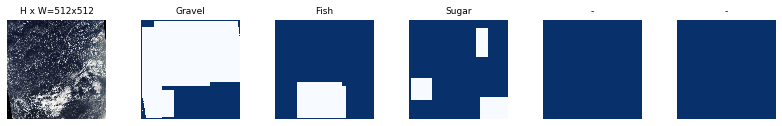

('/content/competitions/understanding_cloud_organization/5d4610c.jpg', ['Fish', 'Flower', 'Sugar'])


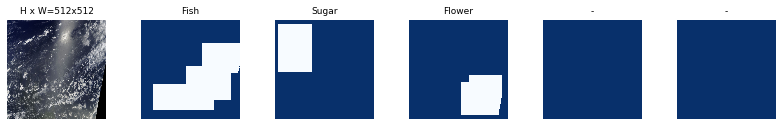

('/content/competitions/understanding_cloud_organization/3f9c4ad.jpg', ['Fish', 'Gravel', 'Sugar'])


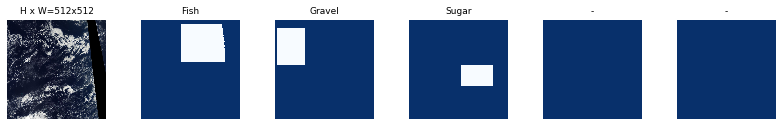

('/content/competitions/understanding_cloud_organization/5265e81.jpg', ['Sugar'])


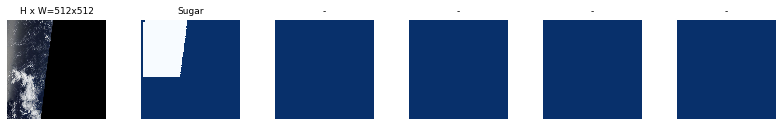

('/content/competitions/understanding_cloud_organization/dfd58e9.jpg', ['Fish', 'Gravel', 'Sugar'])


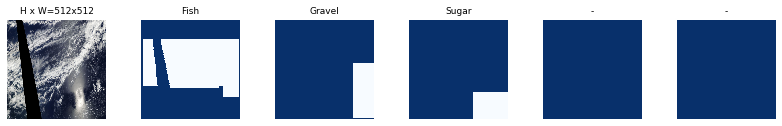

In [0]:
training_percentage = 0.9

training_set_size = int(training_percentage*len(df))
validation_set_size = int((1-training_percentage)*len(df))

train_dataset = CloudDataset(df[:training_set_size])
train_dataset.prepare()

valid_dataset = CloudDataset(df[training_set_size:training_set_size+validation_set_size])
valid_dataset.prepare()

for i in range(5):
    image_id = random.choice(train_dataset.image_ids)
    print(train_dataset.image_reference(image_id))
    
    image = train_dataset.load_image(image_id)
    mask, class_ids = train_dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, train_dataset.class_names, limit=5)

In [0]:
augmentation = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5)
], random_order=True)

In [0]:
model = modellib.MaskRCNN(mode='training', config=config, model_dir=ROOT_DIR)

model.load_weights(COCO_WEIGHTS_PATH, by_name=True, exclude=[
    'mrcnn_class_logits', 'mrcnn_bbox_fc', 'mrcnn_bbox', 'mrcnn_mask'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead








In [0]:
%%time
model.train(train_dataset, valid_dataset,
            learning_rate=0.0002,
            epochs=2,
            layers='heads',
            augmentation=None)

history = model.keras_model.history.history


Starting at epoch 0. LR=0.0002

Checkpoint Path: cloud20191201T1553/mask_rcnn_cloud_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistribute

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'




Epoch 1/2
4500/4500 [==============================] - 2869s 637ms/step - loss: 2.1497 - rpn_class_loss: 0.0161 - rpn_bbox_loss: 0.8897 - mrcnn_class_loss: 0.1822 - mrcnn_bbox_loss: 0.5582 - mrcnn_mask_loss: 0.5036 - val_loss: 2.0374 - val_rpn_class_loss: 0.0137 - val_rpn_bbox_loss: 0.8229 - val_mrcnn_class_loss: 0.2175 - val_mrcnn_bbox_loss: 0.5229 - val_mrcnn_mask_loss: 0.4605

Epoch 2/2
4500/4500 [==============================] - 2760s 613ms/step - loss: 1.9789 - rpn_class_loss: 0.0139 - rpn_bbox_loss: 0.8405 - mrcnn_class_loss: 0.2055 - mrcnn_bbox_loss: 0.4845 - mrcnn_mask_loss: 0.4346 - val_loss: 1.9393 - val_rpn_class_loss: 0.0134 - val_rpn_bbox_loss: 0.8122 - val_mrcnn_class_loss: 0.2067 - val_mrcnn_bbox_loss: 0.4821 - val_mrcnn_mask_loss: 0.4249
CPU times: user 29min 11s, sys: 5min 39s, total: 34min 50s
Wall time: 1h 35min 10s


In [0]:
%%time
model.train(train_dataset, valid_dataset,
            learning_rate=0.0001,
            epochs=9,
            layers='all',
            augmentation=augmentation)

new_history = model.keras_model.history.history
for k in new_history: history[k] = history[k] + new_history[k]


Starting at epoch 2. LR=0.0001

Checkpoint Path: cloud20191201T1553/mask_rcnn_cloud_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b          (BatchNorm)
res

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multi

Epoch 3/9
4500/4500 [==============================] - 3324s 739ms/step - loss: 1.9033 - rpn_class_loss: 0.0122 - rpn_bbox_loss: 0.7874 - mrcnn_class_loss: 0.2055 - mrcnn_bbox_loss: 0.4705 - mrcnn_mask_loss: 0.4277 - val_loss: 1.8480 - val_rpn_class_loss: 0.0115 - val_rpn_bbox_loss: 0.7330 - val_mrcnn_class_loss: 0.2182 - val_mrcnn_bbox_loss: 0.4650 - val_mrcnn_mask_loss: 0.4203
Epoch 4/9
4500/4500 [==============================] - 3234s 719ms/step - loss: 1.8345 - rpn_class_loss: 0.0114 - rpn_bbox_loss: 0.7429 - mrcnn_class_loss: 0.2079 - mrcnn_bbox_loss: 0.4527 - mrcnn_mask_loss: 0.4195 - val_loss: 1.8270 - val_rpn_class_loss: 0.0113 - val_rpn_bbox_loss: 0.7296 - val_mrcnn_class_loss: 0.2209 - val_mrcnn_bbox_loss: 0.4524 - val_mrcnn_mask_loss: 0.4128
Epoch 5/9
4500/4500 [==============================] - 3224s 716ms/step - loss: 1.7838 - rpn_class_loss: 0.0107 - rpn_bbox_loss: 0.7142 - mrcnn_class_loss: 0.2050 - mrcnn_bbox_loss: 0.4392 - mrcnn_mask_loss: 0.4147 - val_loss: 1.7972 - 

In [0]:
epochs = range(9)

plt.figure(figsize=(18, 6))

#plt.subplot(131)
plt.plot(epochs, history['loss'], label="train loss")
plt.plot(epochs, history['val_loss'], label="valid loss")
plt.legend()
#plt.subplot(132)
#plt.plot(epochs, history['mrcnn_class_loss'], label="train class loss")
#plt.plot(epochs, history['val_mrcnn_class_loss'], label="valid class loss")
#plt.legend()
#plt.subplot(133)
#plt.plot(epochs, history['mrcnn_mask_loss'], label="train mask loss")
#plt.plot(epochs, history['val_mrcnn_mask_loss'], label="valid mask loss")
#plt.legend()

plt.show()

NameError: ignored

In [0]:
best_epoch = np.argmin(history["val_loss"]) + 1
print("Best epoch: ", best_epoch)
print("Valid loss: ", history["val_loss"][best_epoch-1])

Best epoch:  8
Valid loss:  1.768620505809784


In [0]:
class InferenceConfig(CloudConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

model = modellib.MaskRCNN(mode='inference', 
                          config=inference_config,
                          model_dir=ROOT_DIR)



Instructions for updating:
Use `tf.cast` instead.


In [0]:
glob_list = glob.glob(f'cloud20191129T0405/mask_rcnn_cloud_{best_epoch:04d}.h5')
model_path = glob_list[0] if glob_list else ''
model.load_weights(model_path, by_name=True)

ValueError: ignored

In [0]:
# Fix overlapping masks
def refine_masks(masks, rois):
    areas = np.sum(masks.reshape(-1, masks.shape[-1]), axis=0)
    mask_index = np.argsort(areas)
    union_mask = np.zeros(masks.shape[:-1], dtype=bool)
    for m in mask_index:
        masks[:, :, m] = np.logical_and(masks[:, :, m], np.logical_not(union_mask))
        union_mask = np.logical_or(masks[:, :, m], union_mask)
    for m in range(masks.shape[-1]):
        mask_pos = np.where(masks[:, :, m]==True)
        if np.any(mask_pos):
            y1, x1 = np.min(mask_pos, axis=1)
            y2, x2 = np.max(mask_pos, axis=1)
            rois[m, :] = [y1, x1, y2, x2]
    return masks, rois

In [0]:
sample_df = pd.read_csv("/content/competitions/understanding_cloud_organization/sample_submission.csv")
sample_df.head()

In [0]:
test_df = pd.DataFrame(columns=["image_id","EncodedPixels","CategoryId"])
for idx,row in sample_df.iterrows():
    image_filename = row.Image_Label.split("_")[0]
    test_df = test_df.append({"image_id": image_filename},ignore_index=True)
test_df = test_df.drop_duplicates()

In [0]:
from zipfile import ZipFile
with ZipFile('/content/competitions/understanding_cloud_organization/test_images.zip', 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!')

In [0]:
#sample_df = pd.read_csv("/content/competitions/understanding_cloud_organization/sample_submission.csv")
test_df.head()
# this part was taken from @raddar's kernel: https://www.kaggle.com/raddar/better-sample-submission


In [0]:
masks_ = test_df.groupby('image_id')['image_id'].count().reset_index(name='N')
masks_ = masks_.loc[masks_.N > 1].image_id.values
###
sample_df = test_df.drop_duplicates('image_id', keep='last').reset_index(drop=True)

In [0]:
import numpy as np
for i in range(8):
    image_id = test_df.sample()["image_id"].values[0]
    image_path = str('/content/competitions/understanding_cloud_organization/'+image_id)
    print(image_path)
   
    img = cv2.imread(image_path)
    #img = np.array(img, dtype=np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    result = model.detect([resize_image(image_path)])
    r = result[0]
    
    if r['masks'].size > 0:
        masks = np.zeros((img.shape[0], img.shape[1], r['masks'].shape[-1]), dtype=np.uint8)
        for m in range(r['masks'].shape[-1]):
            masks[:, :, m] = cv2.resize(r['masks'][:, :, m].astype('uint8'), 
                                        (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
        
        y_scale = img.shape[0]/IMAGE_SIZE
        x_scale = img.shape[1]/IMAGE_SIZE
        rois = (r['rois'] * [y_scale, x_scale, y_scale, x_scale]).astype(int)
        
        masks, rois = refine_masks(masks, rois)
    else:
        masks, rois = r['masks'], r['rois']
        
    visualize.display_instances(img, rois, masks, r['class_ids'], 
                                ['bg']+category_list, r['scores'],
                                title=image_id, figsize=(12, 12))

In [0]:
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return ' '.join([str(x) for x in run_lengths])

In [0]:
submission_df = sample_df.copy()
submission_df["EncodedPixels"] = ""
with tqdm(total=len(test_df)) as pbar:
    for i,row in test_df.iterrows():
        pbar.update(1)
        image_id = row["image_id"]
        image_path = str('/content/competitions/understanding_cloud_organization/'+image_id)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        result = model.detect([resize_image(image_path)])
        r = result[0]

        if r['masks'].size > 0:
            masks = np.zeros((img.shape[0], img.shape[1], r['masks'].shape[-1]), dtype=np.uint8)
            for m in range(r['masks'].shape[-1]):
                masks[:, :, m] = cv2.resize(r['masks'][:, :, m].astype('uint8'), 
                                            (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

            y_scale = img.shape[0]/IMAGE_SIZE
            x_scale = img.shape[1]/IMAGE_SIZE
            rois = (r['rois'] * [y_scale, x_scale, y_scale, x_scale]).astype(int)
            masks, rois, class_ids = r['masks'], r['rois'], r['class_ids']

            #The following piece of code is creating rectangular masks from
            # the ROIs instead of using the masks drawn by the MaskRCNN.
            # It also removes any missing area from the imagery from the predicted masks.
            # Everything is added directly to the submission dataframe.
            rectangular_masks = []
            mask_dict = {"Fish":[],"Flower":[],"Gravel":[],"Sugar":[]}
            for roi, class_id in zip(rois, class_ids):
                rectangular_mask = np.zeros((512,512))
                rectangular_mask[roi[0]:roi[2], roi[1]:roi[3]] = 255
                img = cv2.resize(img, dsize=(512,512), interpolation = cv2.INTER_LINEAR)
                cropped_img = img[roi[0]:roi[2], roi[1]:roi[3]]
                
                kernel = np.ones((5,5),np.uint8)
                missing_data = np.where(cropped_img[:,:,0]==0,255,0).astype('uint8')
                contour_mask = np.zeros(missing_data.shape)
                opening = cv2.morphologyEx(missing_data.astype('uint8'), cv2.MORPH_OPEN, kernel)
                contours= cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
                if len(contours[0])>0:
                    largest_contour = max(contours[0], key = cv2.contourArea)
                    cv2.fillPoly(contour_mask, pts =[largest_contour], color=(255))
                    kernel = np.ones((5,5),np.uint8)
                    opening = cv2.morphologyEx(contour_mask, cv2.MORPH_OPEN, kernel)
                    fixed_mask = np.where(opening[:,:]==255,0,255)
                    rectangular_mask[roi[0]:roi[2], roi[1]:roi[3]] = fixed_mask.copy()
                    
                if mask_dict[category_list[class_id-1]]==[]:
                    mask_dict[category_list[class_id-1]] = rectangular_mask
                else:
                    previous_mask = mask_dict[category_list[class_id-1]].copy()
                    #prevents a bug where the mask is in int64
                    previous_mask = previous_mask.astype('float64')
                    boolean_mask = np.ma.mask_or(previous_mask, rectangular_mask)
                    merged_mask = np.where(boolean_mask, 255, 0)
                    mask_dict[category_list[class_id-1]] = merged_mask

            
            #Going through the masks per category and create a md mask in RLE
            for cloud_category in mask_dict.keys():
                if mask_dict[cloud_category]!=[]:
                    #resizing for submission
                    resized_mask = cv2.resize((mask_dict[cloud_category]/255).astype('uint8'), dsize=(525,350), interpolation = cv2.INTER_LINEAR)
                    rle_str = rle_encoding(resized_mask)
                    image_label = "{}_{}".format(image_id,cloud_category)
                    submission_df.loc[submission_df['Image_Label']==image_label,'EncodedPixels'] = rle_str
        else:
            masks, rois = r['masks'], r['rois']

In [0]:
submission_df.query("EncodedPixels!=''").head()

In [0]:
submission_df.to_csv("/content/competitions/understanding_cloud_organization/submission.csv",index=False)